# Logistic Regression Exercises

- In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

Create a new notebook, logistic_regression, use it to answer the following questions:

For all of the models you create, choose a threshold that optimizes for accuracy.

Create a model that includes only age, fare, and pclass. Does this model perform better than your baseline?

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from prepare import titanic_pipeline

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Found your sauce my bro
Found your sauce my bro
Found your sauce my bro


In [2]:
train, val, test = titanic_pipeline()
train.head()

Found your sauce my bro


,survived,pclass,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,0,1,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,0,3,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,1,3,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,0,1,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,0,3,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


In [3]:
def xy_split(df):
    
    return df.drop(columns = ['survived']), df.survived

In [4]:
X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)

X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,1,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,3,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,3,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,1,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,3,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


In [5]:
def keep_cols(df):
    
    cols_to_keep = ['pclass', 'age', 'fare']
    return df[cols_to_keep], df.survived

In [6]:
X_train, y_train = keep_cols(train)
X_val, y_val = keep_cols(val)

X_train.head()

,pclass,age,fare
748,1,19.0,53.1000
45,3,29.0,8.0500
28,3,29.0,7.8792
633,1,29.0,0.0000
403,3,28.0,15.8500


In [7]:
y_train.mode()

0    0
Name: survived, dtype: int64

In [8]:
train.survived.value_counts(normalize=True)

0    0.616372
1    0.383628
Name: survived, dtype: float64

In [9]:
base_acc = (y_train == 0).mean()
round(base_acc, 2)

0.62

In [10]:
seed = 42

logit = LogisticRegression(random_state=seed, max_iter=400,
                          solver = 'liblinear', penalty ='l2')

logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)


print("Baseline is", round(base_acc, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Baseline is 0.62
Logistic Regression using age, pclass, and fare features
Accuracy of Logistic Regression classifier on training set: 0.71


In [11]:
y_pred_proba = np.array([i[1] for i in y_pred_proba])

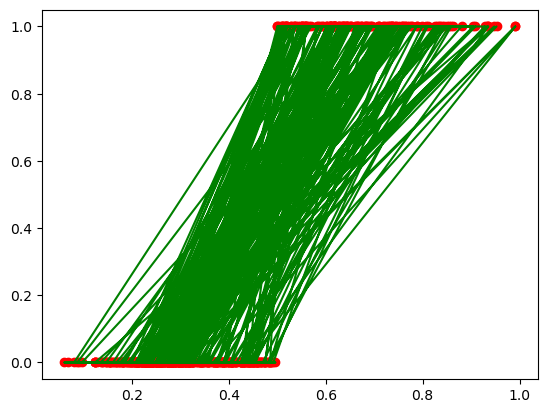

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# scatter plot where x is the probabilities and y is the class (0, 1)
ax.scatter(y_pred_proba, y_pred, color='red')
ax.plot(y_pred_proba, y_pred, color='green')
plt.show()

Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [13]:
train, val, test = titanic_pipeline()

Found your sauce my bro


In [14]:
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,0,1,19.0,1,0,53.1,0,1,1,0,0,0,0,1


In [15]:
def xy_split(df):
    
    return df.drop(columns = ['survived']), df.survived

In [16]:
X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)

X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,1,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,3,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,3,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,1,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,3,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


In [17]:
def keep_cols(df):
    
    cols_to_keep = ['pclass', 'age', 'fare', 'sex_male']
    return df[cols_to_keep], df.survived

In [18]:
X_train, y_train = keep_cols(train)
X_val, y_val = keep_cols(val)

X_train.head()

,pclass,age,fare,sex_male
748,1,19.0,53.1000,1
45,3,29.0,8.0500,1
28,3,29.0,7.8792,0
633,1,29.0,0.0000,1
403,3,28.0,15.8500,1


In [19]:
y_train.mode()

0    0
Name: survived, dtype: int64

In [20]:
base_acc = (y_train == 0).mean()
round(base_acc, 2)

0.62

In [21]:
seed = 42

logit = LogisticRegression(random_state=seed, max_iter=400,
                          solver = 'liblinear', penalty ='l2')

logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)


print("Baseline is", round(base_acc, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Baseline is 0.62
Logistic Regression using age, pclass, and fare features
Accuracy of Logistic Regression classifier on training set: 0.80


In [22]:
y_pred_proba = np.array([i[1] for i in y_pred_proba])

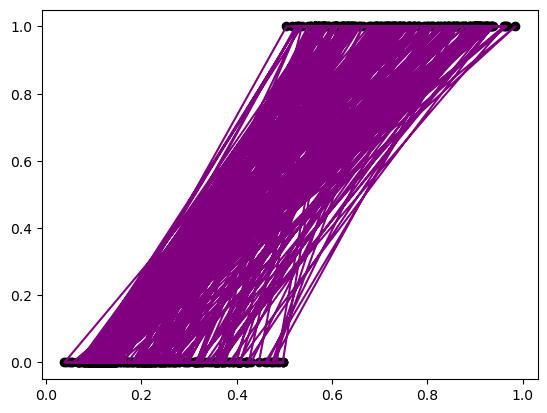

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# scatter plot where x is the probabilities and y is the class (0, 1)
ax.scatter(y_pred_proba, y_pred, color='black')
ax.plot(y_pred_proba, y_pred, color='purple')
plt.show()

- Try out other combinations of features and models.

### Model 1
### _______

In [24]:
train, val, test = titanic_pipeline()
train.head()

Found your sauce my bro


,survived,pclass,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,0,1,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,0,3,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,1,3,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,0,1,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,0,3,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


In [25]:
def xy_split(df):

    df.columns = df.columns.str.lower()
    return df.drop(columns = ['survived']), df.survived

In [26]:
X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)

X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,class_first,class_second,class_third,embark_town_cherbourg,embark_town_queenstown,embark_town_southampton
748,1,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,3,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,3,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,1,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,3,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


In [27]:
def keep_cols(df):
    
    cols_to_keep = ['age', 'sibsp', 'fare', 'sex_male', 'class_first', 'class_third', 'embark_town_cherbourg', 'embark_town_southampton']
    return df[cols_to_keep], df.survived
    f.survived

In [28]:
X_train, y_train = keep_cols(train)
X_val, y_val = keep_cols(val)

X_train.head()

,age,sibsp,fare,sex_male,class_first,class_third,embark_town_cherbourg,embark_town_southampton
748,19.0,1,53.1000,1,1,0,0,1
45,29.0,0,8.0500,1,0,1,0,1
28,29.0,0,7.8792,0,0,1,0,0
633,29.0,0,0.0000,1,1,0,0,1
403,28.0,1,15.8500,1,0,1,0,1


In [29]:
y_train.mode()

0    0
Name: survived, dtype: int64

In [30]:
train.survived.value_counts(normalize=True)

0    0.616372
1    0.383628
Name: survived, dtype: float64

In [31]:
base_acc = (y_train == 0).mean()
round(base_acc, 2)

0.62

In [32]:
seed = 42

logit = LogisticRegression(random_state=seed, max_iter=400,
                          solver = 'liblinear', penalty ='l2')

logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)


print("Baseline is", round(base_acc, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Baseline is 0.62
Logistic Regression using age, pclass, and fare features
Accuracy of Logistic Regression classifier on training set: 0.80


In [33]:
y_pred_proba = np.array([i[1] for i in y_pred_proba])

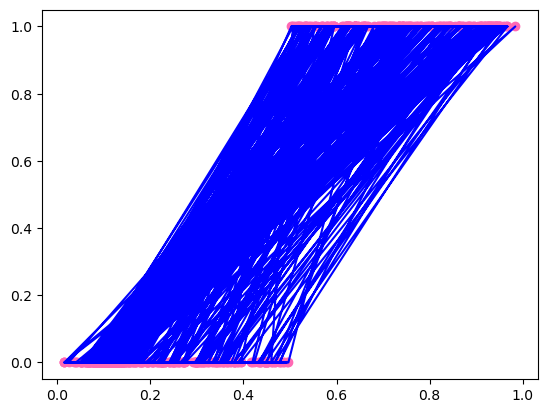

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# scatter plot where x is the probabilities and y is the class (0, 1)
ax.scatter(y_pred_proba, y_pred, color='hotpink')
ax.plot(y_pred_proba, y_pred, color='blue')
plt.show()

### Model 2
### ____________


In [35]:
train, val, test = titanic_pipeline()
train.head()

Found your sauce my bro


,survived,pclass,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,0,1,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,0,3,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,1,3,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,0,1,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,0,3,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


In [36]:
def xy_split(df):

    df.columns = df.columns.str.lower()
    return df.drop(columns = ['survived']), df.survived

In [37]:
X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)

X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,class_first,class_second,class_third,embark_town_cherbourg,embark_town_queenstown,embark_town_southampton
748,1,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,3,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,3,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,1,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,3,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


In [38]:
def keep_cols(df):
    
    cols_to_keep = ['fare', 'sex_male', 'class_second', 'class_third', 'embark_town_cherbourg']
    return df[cols_to_keep], df.survived

In [39]:
X_train, y_train = keep_cols(train)
X_val, y_val = keep_cols(val)

X_train.head()

,fare,sex_male,class_second,class_third,embark_town_cherbourg
748,53.1000,1,0,0,0
45,8.0500,1,0,1,0
28,7.8792,0,0,1,0
633,0.0000,1,0,0,0
403,15.8500,1,0,1,0


In [40]:
y_train.mode()

0    0
Name: survived, dtype: int64

In [41]:
train.survived.value_counts(normalize=True)

0    0.616372
1    0.383628
Name: survived, dtype: float64

In [42]:
base_acc = (y_train == 0).mean()
round(base_acc, 2)

0.62

In [43]:
seed = 42

logit = LogisticRegression(random_state=seed, max_iter=400,
                          solver = 'liblinear', penalty ='l2')

logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)


print("Baseline is", round(base_acc, 2))
print("Logistic Regression using fare, sex_male, class_second, class_third, embark_town_cherbourg features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Baseline is 0.62
Logistic Regression using fare, sex_male, class_second, class_third, embark_town_cherbourg features
Accuracy of Logistic Regression classifier on training set: 0.78


In [44]:
y_pred_proba = np.array([i[1] for i in y_pred_proba])

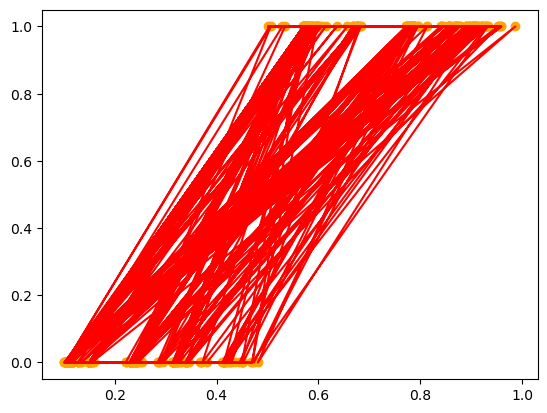

In [45]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# scatter plot where x is the probabilities and y is the class (0, 1)
ax.scatter(y_pred_proba, y_pred, color='orange')
ax.plot(y_pred_proba, y_pred, color='red')
plt.show()

### Model 3
### ____________


In [46]:
train, val, test = titanic_pipeline()
train.head()

Found your sauce my bro


,survived,pclass,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,0,1,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,0,3,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,1,3,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,0,1,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,0,3,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


In [47]:
def xy_split(df):

    df.columns = df.columns.str.lower()
    return df.drop(columns = ['survived']), df.survived

In [48]:
X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)

X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,class_first,class_second,class_third,embark_town_cherbourg,embark_town_queenstown,embark_town_southampton
748,1,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,3,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,3,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,1,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,3,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


In [49]:
def keep_cols(df):
    
    cols_to_keep = ['pclass', 'sibsp', 'age', 'fare', 'sex_male', 'class_first', 'class_second', 'class_third', 'embark_town_cherbourg', 'embark_town_queenstown']
    return df[cols_to_keep], df.survived

In [50]:
X_train, y_train = keep_cols(train)
X_val, y_val = keep_cols(val)

X_train.head()

,pclass,sibsp,age,fare,sex_male,class_first,class_second,class_third,embark_town_cherbourg,embark_town_queenstown
748,1,1,19.0,53.1000,1,1,0,0,0,0
45,3,0,29.0,8.0500,1,0,0,1,0,0
28,3,0,29.0,7.8792,0,0,0,1,0,1
633,1,0,29.0,0.0000,1,1,0,0,0,0
403,3,1,28.0,15.8500,1,0,0,1,0,0


In [51]:
y_train.mode()

0    0
Name: survived, dtype: int64

In [52]:
train.survived.value_counts(normalize=True)

0    0.616372
1    0.383628
Name: survived, dtype: float64

In [53]:
base_acc = (y_train == 0).mean()
round(base_acc, 2)

0.62

In [54]:
seed = 42

logit = LogisticRegression(random_state=seed, max_iter=500000,
                          solver = 'liblinear', penalty ='l2')

logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)


print("Baseline is", round(base_acc, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Baseline is 0.62
Logistic Regression using age, pclass, and fare features
Accuracy of Logistic Regression classifier on training set: 0.81


In [55]:
y_pred_proba = np.array([i[1] for i in y_pred_proba])

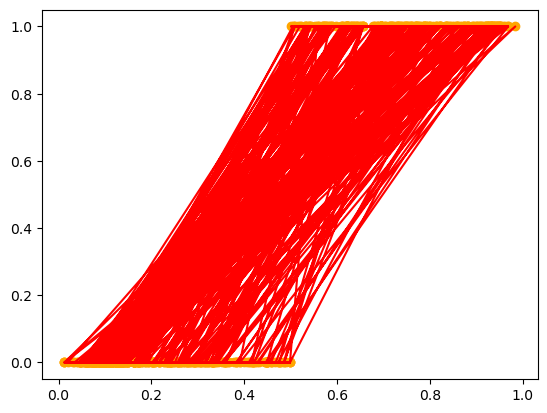

In [56]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# scatter plot where x is the probabilities and y is the class (0, 1)
ax.scatter(y_pred_proba, y_pred, color='orange')
ax.plot(y_pred_proba, y_pred, color='red')
plt.show()

- Use your best 3 models to predict and evaluate on your validate sample.

### Best Model 1

Found your sauce my bro


Baseline is: 0.62 


Logistic Regression using pclass, sibsp, age, fare, sex_male, class_first, class_second, class_third, embark_town_cherbourg, embark_town_queenstown features

Accuracy of Logistic Regression classifier on validation set: 0.81



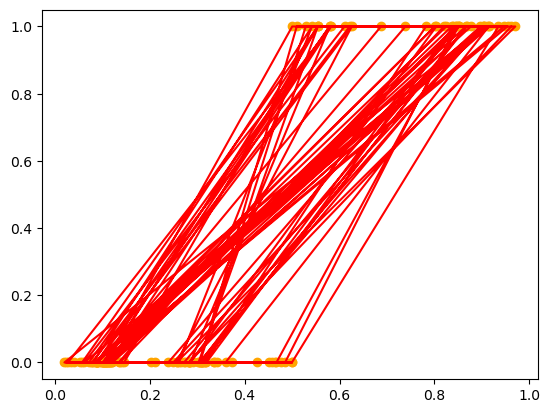


Train Score: 0.8057784911717496

Validation Score: 0.8059701492537313


In [57]:
train, val, test = titanic_pipeline()


def xy_split(df):

    df.columns = df.columns.str.lower()
    return df.drop(columns = ['survived']), df.survived


X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)


def keep_cols(df):
    
    cols_to_keep = ['pclass', 'sibsp', 'age', 'fare', 'sex_male', 'class_first', 'class_second', 'class_third', 'embark_town_cherbourg', 'embark_town_queenstown']
    return df[cols_to_keep], df.survived


X_train, y_train = keep_cols(train)
X_val, y_val = keep_cols(val)

base_acc = (y_train == 0).mean()
round(base_acc, 2)

seed = 42

logit = LogisticRegression(random_state=seed, max_iter=500000,
                          solver = 'liblinear', penalty ='l2')

logit.fit(X_val, y_val)

y_pred = logit.predict(X_val)
y_pred_proba = logit.predict_proba(X_val)


print("\n\nBaseline is:", round(base_acc, 2), '\n\n')
print("Logistic Regression using pclass, sibsp, age, fare, sex_male, class_first, class_second, class_third, embark_town_cherbourg, embark_town_queenstown features\n")
print('Accuracy of Logistic Regression classifier on validation set: {:.2f}\n'
     .format(logit.score(X_val, y_val)))

y_pred_proba = np.array([i[1] for i in y_pred_proba])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(y_pred_proba, y_pred, color='orange')
ax.plot(y_pred_proba, y_pred, color='red')
plt.show()

print('\nTrain Score:', logit.score(X_train, y_train))
print('\nValidation Score:', logit.score(X_val, y_val))

In [58]:
pd.DataFrame({'feature': X_val.columns,
              'coefficient': logit.coef_[0]})

,feature,coefficient
0,pclass,0.174161
1,sibsp,-0.440617
2,age,-0.014361
3,fare,0.006863
4,sex_male,-2.559713
5,class_first,1.038141
6,class_second,0.719602
7,class_third,-0.767728
8,embark_town_cherbourg,0.333630
9,embark_town_queenstown,-0.163417


### Best Model 2

Found your sauce my bro


Baseline is: 0.62 


Logistic Regression using age, pclass, and fare features

Accuracy of Logistic Regression classifier on validation set: 0.84



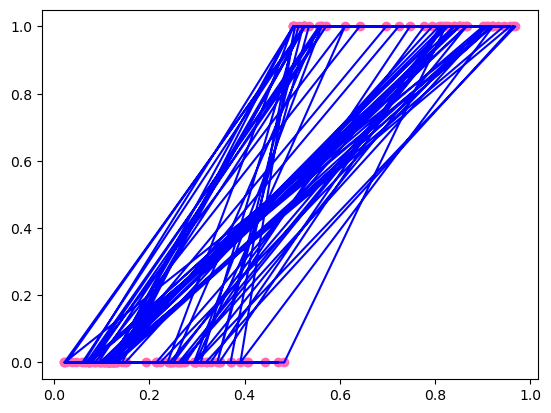


Train Score: 0.8025682182985554

Validation Score: 0.835820895522388


In [59]:
train, val, test = titanic_pipeline()

def xy_split(df):

    df.columns = df.columns.str.lower()
    return df.drop(columns = ['survived']), df.survived


X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)


def keep_cols(df):

    cols_to_keep = ['age', 'sibsp', 'fare', 'sex_male', 'class_first', 'class_third', 'embark_town_cherbourg', 'embark_town_southampton']
    return df[cols_to_keep], df.survived


X_train, y_train = keep_cols(train)
X_val, y_val = keep_cols(val)

base_acc = (y_train == 0).mean()
round(base_acc, 2)

seed = 42

logit_best = LogisticRegression(random_state=seed, max_iter=400,
                          solver = 'liblinear', penalty ='l2')

logit_best.fit(X_val, y_val)

y_pred = logit_best.predict(X_val)
y_pred_proba = logit_best.predict_proba(X_val)


print("\n\nBaseline is:", round(base_acc, 2), '\n\n')
print("Logistic Regression using age, pclass, and fare features\n")
print('Accuracy of Logistic Regression classifier on validation set: {:.2f}\n'
     .format(logit_best.score(X_val, y_val)))

y_pred_proba = np.array([i[1] for i in y_pred_proba])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# scatter plot where x is the probabilities and y is the class (0, 1)
ax.scatter(y_pred_proba, y_pred, color='hotpink')
ax.plot(y_pred_proba, y_pred, color='blue')
plt.show()

print('\nTrain Score:', logit_best.score(X_train, y_train))
print('\nValidation Score:', logit_best.score(X_val, y_val))

In [60]:
pd.DataFrame({'feature': X_val.columns,
              'coefficient': logit_best.coef_[0]})

,feature,coefficient
0,age,-0.012295
1,sibsp,-0.438093
2,fare,0.006462
3,sex_male,-2.539522
4,class_first,0.473638
5,class_third,-1.005500
6,embark_town_cherbourg,0.672234
7,embark_town_southampton,0.476193


### Best Model 3

Found your sauce my bro


Baseline is: 0.62 


Logistic Regression using fare, sex_male, class_second, class_third, embark_town_cherbourg features

Accuracy of Logistic Regression classifier on training set: 0.78



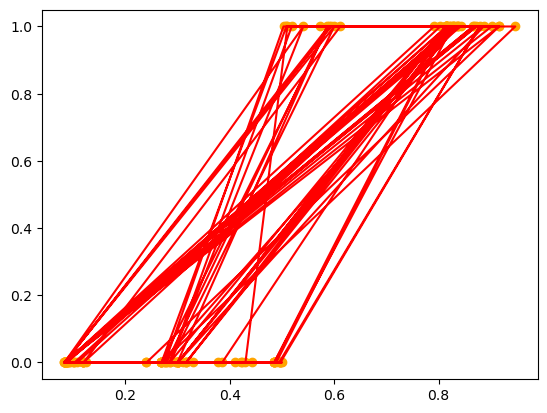


Train Score: 0.7624398073836276

Validation Score: 0.7835820895522388


In [61]:
train, val, test = titanic_pipeline()

def xy_split(df):

    df.columns = df.columns.str.lower()
    return df.drop(columns = ['survived']), df.survived


X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)


def keep_cols(df):
    
    cols_to_keep = ['fare', 'sex_male', 'class_second', 'class_third', 'embark_town_cherbourg']
    return df[cols_to_keep], df.survived


X_train, y_train = keep_cols(train)
X_val, y_val = keep_cols(val)

base_acc = (y_train == 0).mean()
round(base_acc, 2)

seed = 42

logit = LogisticRegression(random_state=seed, max_iter=400,
                          solver = 'liblinear', penalty ='l2')

logit.fit(X_val, y_val)

y_pred = logit.predict(X_val)
y_pred_proba = logit.predict_proba(X_val)


print("\n\nBaseline is:", round(base_acc, 2), '\n\n')
print("Logistic Regression using fare, sex_male, class_second, class_third, embark_town_cherbourg features\n")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}\n'
     .format(logit.score(X_val, y_val)))

y_pred_proba = np.array([i[1] for i in y_pred_proba])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# scatter plot where x is the probabilities and y is the class (0, 1)
ax.scatter(y_pred_proba, y_pred, color='orange')
ax.plot(y_pred_proba, y_pred, color='red')
plt.show()

print('\nTrain Score:', logit.score(X_train, y_train))
print('\nValidation Score:', logit.score(X_val, y_val))

In [62]:
pd.DataFrame({'feature': X_val.columns,
              'coefficient': logit.coef_[0]})

,feature,coefficient
0,fare,0.005697
1,sex_male,-2.331681
2,class_second,0.231456
3,class_third,-1.285319
4,embark_town_cherbourg,0.400039


Choose you best model from the validation performation, and evaluate it on the test dataset

## Best Model Test:

Found your sauce my bro


Baseline is: 0.62 


Logistic Regression using age, pclass, and fare features

Accuracy of Logistic Regression classifier on validation set: 0.77



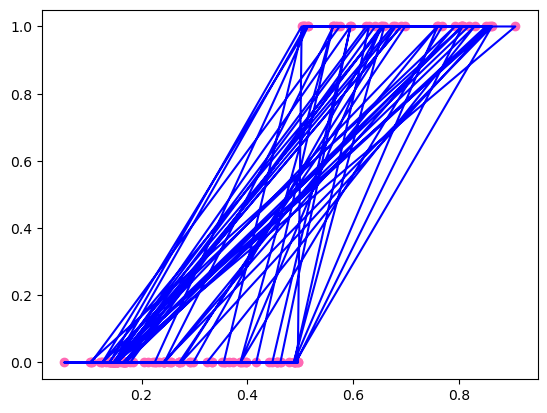


Train Score: 0.8009630818619583

Validation Score: 0.8208955223880597

Test Score: 0.7686567164179104


In [94]:
train, val, test = titanic_pipeline()

def xy_split(df):

    df.columns = df.columns.str.lower()
    return df.drop(columns = ['survived']), df.survived


X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)
X_test, y_test = xy_split(test)


def keep_cols(df):

    cols_to_keep = ['age', 'sibsp', 'fare', 'sex_male', 'class_first', 'class_third', 'embark_town_cherbourg', 'embark_town_southampton']
    return df[cols_to_keep], df.survived


X_train, y_train = keep_cols(train)
X_val, y_val = keep_cols(val)
X_test, y_test = keep_cols(test)

base_acc = (y_train == 0).mean()
round(base_acc, 2)

seed = 42

#  C = .01, .1, 1, 10, 100, 1000
logit_best = LogisticRegression(C = 1.1, random_state=seed, max_iter=400, solver = 'liblinear', penalty ='l2')

# Now using th best model to test the test' data
logit_best.fit(X_test, y_test)

y_pred = logit_best.predict(X_test)
y_pred_proba = logit_best.predict_proba(X_test)


print("\n\nBaseline is:", round(base_acc, 2), '\n\n')
print("Logistic Regression using age, pclass, and fare features\n")
print('Accuracy of Logistic Regression classifier on validation set: {:.2f}\n'
     .format(logit_best.score(X_test, y_test)))

y_pred_proba = np.array([i[1] for i in y_pred_proba])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# scatter plot where x is the probabilities and y is the class (0, 1)
ax.scatter(y_pred_proba, y_pred, color='hotpink')
ax.plot(y_pred_proba, y_pred, color='blue')
plt.show()

print('\nTrain Score:', logit_best.score(X_train, y_train))
print('\nValidation Score:', logit_best.score(X_val, y_val))
print('\nTest Score:', logit_best.score(X_test, y_test))

In [66]:
pd.DataFrame({'feature': X_val.columns,
              'coefficient': logit_best.coef_[0]})

,feature,coefficient
0,age,-0.019452
1,sibsp,-0.060500
2,fare,0.007485
3,sex_male,-0.124532
4,class_first,0.036896
5,class_third,-0.073772
6,embark_town_cherbourg,0.041662
7,embark_town_southampton,-0.043198


How do the performance metrics compare to validate? to train?

- The performance of the model on Test set (0.76) compared to the validate set (0.83) showed decrease in accuracy and even a 0.02 percent decrease after validate to the train set (0.80). My best performing model with the engineered features the hyperparameters set default 'liblinear' and set penalty with ridge regression.

# -------------------------------------------------------------

#### Bonus1:
- How do different strategies for handling the missing values in the age column affect model performance?

### These different strategies for handling the missing values in the age column affects performance by giving a larger amount of data to decide from. versus when you leave those features missing you mostly opt for dropping them in my experience so far. I have learned that people take the mode and or mean and they fill those nan or null values. This will hopefully increase of the importance of this feature alone or balance the weight of the categorical and continuous features in the dataset.

#### Bonus2: 
- How do different strategies for encoding sex affect model performance?

We have learned One-hot/dummy encoding which we can see that is effective for encoding ctegorical features like the 'sex' categorical feature from our Titanic Dataset. I would say encoding this feature creates a boolean value out of a categorical column of data to use as part of classifier in our model's evaluation of each split dataset and aid in prediction/modeling evaluation metrics.

It definitely was a feature in this exercise that was very important and could not improve the accuracy using this method of modeling without it.

#### Bonus3: 
- scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty. Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.

C = .01, .1, 1, 10, 100, 1000

# ✔️ 🦾

#### Bonus Bonus: how does scaling the data interact with your choice of C?

scaling the data interacts with our changing of the regularization penalty to the cofficients (C) by aiding weak models balance variables in order to improve the perforance of the algorithm and the output of those algorithms which are our machine learning models.